## SQL 쿼리문 작성해보기

In [1]:
import sqlite3

In [2]:
!pwd

/home/aiffel0049/aiffel/Foundamental/20.sql


In [3]:
import os
db_path = '/home/aiffel0049/aiffel/Foundamental/20.sql/sqlite/mydb.db'
conn = sqlite3.connect(db_path)
print(conn)

- SQL과 관련된 셋팅이 포함됨

In [4]:
c = conn.cursor()
print(c)

- Query를 수행하고 결과를 얻는데 사용됨
- INSERT(결과를 받지않음), SELECT(결과를 받아옴)

In [5]:
# stocks이라는 이름의 테이블을 하나 생성합니다. 혹시 이미 생성되었다면 생략합니다. 
c.execute("CREATE TABLE  IF NOT EXISTS  stocks (date text, trans text, symbol text, qty real, price real)")

# stocks 테이블에 데이터를 하나 인서트합니다. 
c.execute("INSERT INTO stocks VALUES ('20200701', 'TEST', 'AIFFEL', 1, 10000)")

# 방금 인서트한 데이터를 조회해 봅니다.
c.execute("SELECT * FROM stocks")

# 조회된 내역을 커서를 통해 가져와 출력해 봅니다.
print(c.fetchone())

('20200701', 'TEST', 'AIFFEL', 1.0, 10000.0)


- conn.commit()을 하지 않으면 쿼리의 결과는 conn 안에만 존재

In [6]:
conn.commit()   # commit()은 cursor의 메소드가 아니라 connection의 메소드입니다. 
print("뿅💛")

뿅💛


In [7]:
c.close()      # 먼저 커서를 닫은 후
conn.close()    # DB 연결을 닫아 줍니다.
print("뿅💛")

뿅💛


### DDL 문으로 작성

In [8]:
import sqlite3
import os

conn = sqlite3.connect(db_path)
c = conn.cursor()

#- ! 재실행 시 테이블이 존재할 수 있으므로 아래처럼 해당 테이블들을 모두 지워줍니다.
c.execute("DROP TABLE IF EXISTS 도서대출내역")
c.execute("DROP TABLE IF EXISTS 도서대출내역2")
c.execute("DROP TABLE IF EXISTS 대출내역")
c.execute("DROP TABLE IF EXISTS 도서명")


#----- 1st table : 도서대출내역 -----#
c.execute("CREATE TABLE IF NOT EXISTS 도서대출내역 (ID varchar, 이름 varchar, 도서ID varchar, 대출일 varchar, 반납일 varchar)")
#- 생성(create)문 : 테이블명, 변수명, 변수타입을 지정

data = [('101','문강태','aaa','2020-06-01','2020-06-05'),
             ('101','문강태','ccc','2020-06-20','2020-06-25'),
             ('102','고문영','bbb','2020-06-01',None),
             ('102','고문영','ddd','2020-06-08',None),
             ('103','문상태','ccc','2020-06-01','2020-06-05'),
             ('104','강기둥',None,None,None)]
#- 입력할 데이터를 그대로 입력 (변수명 순서 기준대로)

c.executemany('INSERT INTO 도서대출내역 VALUES (?,?,?,?,?)', data)
#- 입력할 데이터를 실제 테이블에 insert하기
#-----------------------------------------------#


#----- 2nd table : 도서대출내역2 -----#
c.execute("CREATE TABLE IF NOT EXISTS 도서대출내역2 (ID varchar, 이름 varchar, 대출년월 varchar, 대출일수 varchar)")

data = [('101','문강태','2020-06','20일'),
             ('102','고문영','2020-06','10일'),
             ('103','문상태','2020-06','8일'),
             ('104','강기둥','2020-06','3일')]
c.executemany('INSERT INTO 도서대출내역2 VALUES (?,?,?,?)', data)
#--------------------------------------------------#


#----- 3rd table : 대출내역 -----#
c.execute("CREATE TABLE IF NOT EXISTS 대출내역 (ID varchar, 이름 varchar, 도서ID varchar)")

data = [('101','문강태','aaa'),
             ('102','고문영','bbb'),
             ('102','고문영','fff'),
             ('103','문상태','ccc'),
             ('104','강기둥',None)]
c.executemany('INSERT INTO 대출내역 VALUES (?,?,?)', data)
#-----------------------------------------#


#----- 4th table : 도서명 -----#
c.execute("CREATE TABLE IF NOT EXISTS 도서명 (도서ID varchar, 도서명 varchar)")

data = [('aaa','악몽을 먹고 자란 소년'),
             ('bbb','좀비아이'),
             ('ccc','공룡백과사전'),
             ('ddd','빨간구두'),
             ('eee','잠자는 숲속의 미녀')]

c.executemany('INSERT INTO 도서명 VALUES (?,?)', data)
#--------------------------------------#

conn.commit()
conn.close()
print("뿅💛")

뿅💛


### DML 문

<pre>#----- 4th table : 도서명 -----#

# [1]
c.execute("CREATE TABLE IF NOT EXISTS 도서명 (도서ID varchar, 도서명 varchar)")

# [2]
data = [('aaa','악몽을 먹고 자란 소년'),
             ('bbb','좀비아이'),
             ('ccc','공룡백과사전'),
             ('ddd','빨간구두'),
             ('eee','잠자는 숲속의 미녀')]

# [3]
c.executemany('INSERT INTO 도서명 VALUES (?,?)', data)
#--------------------------------------#</pre>

- 1: 테이블 생성
- 2: 변수명에 맞는 데이터 생성
- 3: 데이터 넣는 질의 작성

## SQL로 자료 검색 방법

In [9]:
conn = sqlite3.connect(db_path)
c = conn.cursor()

for row in c.execute('SELECT * FROM 도서명'):
    print(row)

('aaa', '악몽을 먹고 자란 소년')
('bbb', '좀비아이')
('ccc', '공룡백과사전')
('ddd', '빨간구두')
('eee', '잠자는 숲속의 미녀')


In [10]:
#- 참고 : 실제 조회를 해보시려면 아래처럼 쓰시면 됩니다.
#- c.execute() 괄호 안에 SQL문을 넣으시면 됩니다.

import os
conn = sqlite3.connect(db_path)  # mydb.db에 연결합니다.
c = conn.cursor()

for row in c.execute('SELECT * FROM 도서대출내역'):
  print(row)

#- ! 출력 시 'NULL' 대신 'None'으로 출력될 수 있으나 동일하게 이해하시면 됩니다.

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('104', '강기둥', None, None, None)


In [11]:
result = c.execute('SELECT ID FROM 도서대출내역;')
for row in result:
    print(row)

('101',)
('101',)
('102',)
('102',)
('103',)
('104',)


In [12]:
result = c.execute('SELECT * FROM 도서대출내역 WHERE 이름 = "문강태";')
for row in result:
    print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')


- where : 조건입력하기

In [13]:
result = c.execute('SELECT 이름 FROM 도서대출내역 GROUP BY 이름;')
for row in result:
    print(row)

('강기둥',)
('고문영',)
('문강태',)
('문상태',)


- group by : 데이터 그룹화
    - 정렬해서 출력도 가능
    - 보통 집계성 함수로 사용

In [14]:
result = c.execute('SELECT * FROM 도서대출내역 ORDER BY ID ;')
for row in result:
    print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('104', '강기둥', None, None, None)


- order by : 데이터 정렬

In [15]:
result = c.execute('SELECT * FROM 도서대출내역 ORDER BY ID DESC ;')
for row in result:
    print(row)

('104', '강기둥', None, None, None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')


- DESC 키워드 : 내림차순 정렬

In [16]:
result = c.execute('SELECT * FROM 도서대출내역 LIMIT 5 ;')
for row in result:
    print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


- 행 일부만 (5) 출력

In [17]:
result = c.execute("""
SELECT 이름, 대출일, 반납일 
FROM 도서대출내역
ORDER BY 대출일 DESC
LIMIT 1;""")
for row in result:
    print(row)

('문강태', '2020-06-20', '2020-06-25')


In [18]:
result = c.execute("""
select 이름, count(*) as 대출건수
from 도서대출내역
group by 이름;""")
for row in result:
    print(row)

('강기둥', 1)
('고문영', 2)
('문강태', 2)
('문상태', 1)


## 데이터 타입 수정

- pragma : DB마다 달라지는 유틸리티 쿼리

In [19]:
import os
conn = sqlite3.connect(db_path)  # mydb.db에 연결합니다.
c = conn.cursor()

for row in c.execute('pragma table_info(도서대출내역)'):
  print(row)

(0, 'ID', 'varchar', 0, None, 0)
(1, '이름', 'varchar', 0, None, 0)
(2, '도서ID', 'varchar', 0, None, 0)
(3, '대출일', 'varchar', 0, None, 0)
(4, '반납일', 'varchar', 0, None, 0)


In [23]:
for row in c.execute("""
SELECT *, SUBSTR(대출일수, 1, (length(대출일수)-1)) AS 대출일수_수정
FROM 도서대출내역2;
"""):
  print(row)

('101', '문강태', '2020-06', '20일', '20')
('102', '고문영', '2020-06', '10일', '10')
('103', '문상태', '2020-06', '8일', '8')
('104', '강기둥', '2020-06', '3일', '3')


- split_part() 함수로도 가능

In [24]:
for row in c.execute("""
SELECT *, CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT) AS 대출일수_수정 
FROM 도서대출내역2 ;
"""):
  print(row)

('101', '문강태', '2020-06', '20일', 20)
('102', '고문영', '2020-06', '10일', 10)
('103', '문상태', '2020-06', '8일', 8)
('104', '강기둥', '2020-06', '3일', 3)


- CAST 형변환

In [31]:
for row in c.execute("""
SELECT ID, 이름, 대출년월
, AVG(CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT)) AS 대출일수_평균 
FROM 도서대출내역2 
GROUP BY 1,2,3;
"""):
  print(row)

('101', '문강태', '2020-06', 20.0)
('102', '고문영', '2020-06', 10.0)
('103', '문상태', '2020-06', 8.0)
('104', '강기둥', '2020-06', 3.0)


## Where 절을 이용해 조건부 조회

- 기본 where 절
        SELECT * FROM 도서대출내역2
        WHERE ~

- 여러 where 조건 절
        SELECT * FROM 도서대출내역2
        WHERE 
                조건1 
        AND 조건2 
        AND 조건3 
        AND (조건 4 OR 조건5);

### 특정 문자를 포함하는 row를 가져오는 경우


In [33]:
for row in c.execute("""
SELECT * FROM 도서대출내역2 
WHERE 이름 LIKE "문%" ;
"""):
  print(row)

('101', '문강태', '2020-06', '20일')
('103', '문상태', '2020-06', '8일')


- %문% : 이름의 시작, 중간, 끝 중 어딘가에 '문'이 포함된 경우를 체크
- %문 : 문으로 끝나는 경우를 체크

### 특정 기간 or 특정 날짜의 이전 or 이후의 row를 가져올 때

In [34]:
for row in c.execute("""
SELECT * FROM 도서대출내역
WHERE 
        대출일 >= "2020-06-01" 
AND 대출일 <= "2020-06-07" ;
"""):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('102', '고문영', 'bbb', '2020-06-01', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


In [35]:
for row in c.execute("""
SELECT * FROM 도서대출내역
WHERE 
        대출일 BETWEEN "2020-06-01" AND "2020-06-07" ;
"""):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('102', '고문영', 'bbb', '2020-06-01', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


- and 키워드와 between and 키워드도 사용 가능

### 특정 숫자 이상 or 이하의 row 조회

In [38]:
for row in c.execute("""
SELECT *
, CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT) AS 대출일수_수정 
FROM 도서대출내역2 
WHERE 
        대출일수_수정 > 5 ;
"""):
  print(row)

('101', '문강태', '2020-06', '20일', 20)
('102', '고문영', '2020-06', '10일', 10)
('103', '문상태', '2020-06', '8일', 8)


### Null 조건 다루는 법

In [39]:
for row in c.execute("""
SELECT * FROM 도서대출내역
WHERE 반납일 IS NOT NULL;
"""):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


In [40]:
for row in c.execute("""
SELECT * FROM 도서대출내역
WHERE 반납일 IS NULL;
"""):
  print(row)

('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('104', '강기둥', None, None, None)


In [44]:
for row in c.execute("""
SELECT 이름 FROM 도서대출내역
WHERE 이름 like '%태'
and 대출일 >= "2020-06-19"
and ID <= 102
and 반납일 IS not NULL;
"""):
  print(row)

('문강태',)


## JOIN 사용하기

### 대출내역 및 도서명 테이블 출력

In [48]:
for row in c.execute("""
SELECT * FROM 대출내역 ;
"""):
  print(row)
print()
for row in c.execute("""
SELECT * FROM 도서명 ;
"""):
  print(row)

('101', '문강태', 'aaa')
('102', '고문영', 'bbb')
('102', '고문영', 'fff')
('103', '문상태', 'ccc')
('104', '강기둥', None)

('aaa', '악몽을 먹고 자란 소년')
('bbb', '좀비아이')
('ccc', '공룡백과사전')
('ddd', '빨간구두')
('eee', '잠자는 숲속의 미녀')


- JOIN의 기본 구문
        SELECT 컬럼1, 컬럼2, 컬럼3... FROM A테이블 AS A
        {INNER/LEFT/RIGHT/FULL OUTER} JOIN B테이블 AS B 
        ON A.결합컬럼 = B.결합컬럼
        WHERE ~

- sqlite : right join, full outer join은 에러발생

### inner join

In [49]:
for row in c.execute("""
SELECT A.*, B.도서명 
FROM 대출내역 AS A 
INNER JOIN 도서명 AS B
ON A.도서ID = B.도서ID
"""):
  print(row)

('101', '문강태', 'aaa', '악몽을 먹고 자란 소년')
('102', '고문영', 'bbb', '좀비아이')
('103', '문상태', 'ccc', '공룡백과사전')


### left join

In [51]:
for row in c.execute("""
SELECT A.*, B.도서명 
FROM 대출내역 AS A 
LEFT JOIN 도서명 AS B
ON A.도서ID = B.도서ID
"""):
  print(row)

('101', '문강태', 'aaa', '악몽을 먹고 자란 소년')
('102', '고문영', 'bbb', '좀비아이')
('102', '고문영', 'fff', None)
('103', '문상태', 'ccc', '공룡백과사전')
('104', '강기둥', None, None)


### right join

In [58]:
# for row in c.execute("""
# SELECT B.*, A.ID, A.이름 
# FROM 대출내역 AS A 
# RIGHT JOIN 도서명 AS B
# ON A.도서ID = B.도서ID
# """):
#   print(row)

# OperationalError: RIGHT and FULL OUTER JOINs are not currently supported

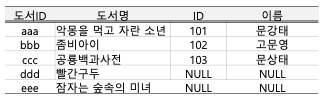

In [60]:
# for row in c.execute("""
# SELECT A.*, B.도서명 
# FROM 대출내역 AS A 
# FULL OUTER JOIN 도서명 AS B
# ON A.도서ID = B.도서ID
# ORDER BY 도서ID ;
# """):
#   print(row)

# perationalError: RIGHT and FULL OUTER JOINs are not currently supported

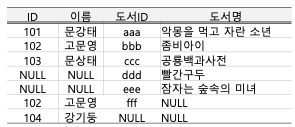

### 중첩 질의(Nested Query)

In [61]:
for row in c.execute("""
SELECT C.이름, COUNT(*) 대출건수
FROM (
    SELECT A.*, B.도서명 
    FROM 대출내역 AS A 
    LEFT JOIN 도서명 AS B
    ON A.도서ID = B.도서ID ) C
GROUP BY C.이름
"""):
  print(row)

('강기둥', 1)
('고문영', 2)
('문강태', 1)
('문상태', 1)


### 쿼리의 조건절 IFNULL

In [62]:
for row in c.execute("""
SELECT A.*, IFNULL(B.도서명, '도서명미상') AS 도서명
FROM 대출내역 AS A 
LEFT JOIN 도서명 AS B
ON A.도서ID = B.도서ID
"""):
  print(row)

('101', '문강태', 'aaa', '악몽을 먹고 자란 소년')
('102', '고문영', 'bbb', '좀비아이')
('102', '고문영', 'fff', '도서명미상')
('103', '문상태', 'ccc', '공룡백과사전')
('104', '강기둥', None, '도서명미상')


- IFNULL을 CASE 문으로 바꾸기
        case when b.도서명 is null
        then '도서명미상'
        else b.도서명
        end

### 쿼리의 조건절 CASE

In [63]:
for row in c.execute("""
SELECT 이름, 
    CASE WHEN 대출일수_수정 > 5
    THEN '기간초과'
    ELSE '기간내'
    END AS 대출기간
FROM (
    SELECT *, CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT) AS 대출일수_수정 
    FROM 도서대출내역2 )
"""):
  print(row)

('문강태', '기간초과')
('고문영', '기간초과')
('문상태', '기간초과')
('강기둥', '기간내')


### 예제
Q5. '도서명' 테이블과 '도서대출내역' 테이블을 도서ID를 key로 하여 LEFT  JOIN해서 |도서ID|도서명|대출건수|대출상태| 항목을 출력하는 쿼리를 작성해 보세요. 

- 대출건수 : 도서별로 도서대출내역 테이블에 대출일자가 있으면 대출건수 1로 본다. 여러 번 대출되었으면 대출된 회수만큼 합산된다. 

- 대출상태 : 대출일자는 NOT NULL인데 반납일자가 NULL인 도서대출내역이 있으면 '대출중', 그렇지 않고 모든 대출내역에 반납일자가 명시되어 있으면  '보관중'으로 본다.

#### 테이블 describe

In [66]:
for row in c.execute("""
pragma table_info(도서명)
"""):
  print(row)
print()
for row in c.execute("""
pragma table_info(도서대출내역)
"""):
  print(row)

(0, '도서ID', 'varchar', 0, None, 0)
(1, '도서명', 'varchar', 0, None, 0)

(0, 'ID', 'varchar', 0, None, 0)
(1, '이름', 'varchar', 0, None, 0)
(2, '도서ID', 'varchar', 0, None, 0)
(3, '대출일', 'varchar', 0, None, 0)
(4, '반납일', 'varchar', 0, None, 0)


#### 테이블 data

In [79]:
for row in c.execute("""
select * from 도서명
"""):
  print(row)
print()
for row in c.execute("""
select * from 도서대출내역
"""):
  print(row)

('aaa', '악몽을 먹고 자란 소년')
('bbb', '좀비아이')
('ccc', '공룡백과사전')
('ddd', '빨간구두')
('eee', '잠자는 숲속의 미녀')

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('104', '강기둥', None, None, None)


#### 도서별로 대출건수, 반납건수를 계산한 테이블

In [85]:
for row in c.execute("""
select a.도서ID, a.도서명,
    case when b.대출일 is null then 0 else 1 end as 대출건수,
    case when b.반납일 is null then 0 else 1 end as 반납건수
from 도서명 as a
left join 도서대출내역 as b
on a.도서ID = b.도서ID
"""):
  print(row)

('aaa', '악몽을 먹고 자란 소년', 1, 1)
('bbb', '좀비아이', 1, 0)
('ccc', '공룡백과사전', 1, 1)
('ccc', '공룡백과사전', 1, 1)
('ddd', '빨간구두', 1, 0)
('eee', '잠자는 숲속의 미녀', 0, 0)


In [91]:
for row in c.execute("""
SELECT c.도서ID, c.도서명, 
    sum(c.대출건수) as 대출건수,
    case when c.대출건수 - c.반납건수 != 0
    then '대출중'
    else '보관중'
    end as 대출상태
FROM
    (select a.도서ID, a.도서명,
        case when b.대출일 is null then 0 else 1 end as 대출건수,
        case when b.반납일 is null then 0 else 1 end as 반납건수
    from 도서명 as a
    left join 도서대출내역 as b
    on a.도서ID = b.도서ID) as c
group by 도서ID
"""):
  print(row)

('aaa', '악몽을 먹고 자란 소년', 1, '보관중')
('bbb', '좀비아이', 1, '대출중')
('ccc', '공룡백과사전', 2, '보관중')
('ddd', '빨간구두', 1, '대출중')
('eee', '잠자는 숲속의 미녀', 0, '보관중')


#### 예시답안

In [87]:
for row in c.execute("""
SELECT C.도서ID, C.도서명, SUM(C.대출건수) AS 대출건수, 
 CASE SUM(C.대출건수)-SUM(C.반납건수) WHEN 0 THEN '보관중' ELSE '대출중' END AS 대출상태
FROM (
    SELECT A.도서ID, A.도서명, 
     CASE WHEN B.대출일 IS NULL THEN 0 ELSE 1 END AS 대출건수,
     CASE WHEN B.반납일 IS NULL THEN 0 ELSE 1 END AS 반납건수
    FROM 도서명 AS A 
    LEFT JOIN 도서대출내역 AS B
    ON A.도서ID = B.도서ID ) AS C
GROUP BY C.도서ID, C.도서명 ;
"""):
    print(row)

('aaa', '악몽을 먹고 자란 소년', 1, '보관중')
('bbb', '좀비아이', 1, '대출중')
('ccc', '공룡백과사전', 2, '보관중')
('ddd', '빨간구두', 1, '대출중')
('eee', '잠자는 숲속의 미녀', 0, '보관중')
